In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

In [7]:
data = pd.read_csv("./data/data.csv")
print(data)

      x
0    88
1    84
2    85
3    85
4    84
..  ...
95  222
96  228
97  226
98  222
99  220

[100 rows x 1 columns]


In [9]:
size = int(len(data) * 0.8)
train, test = data[0:size], data[size:len(data)]

In [11]:
model = ARIMA(train, order = (1, 2, 3))
fittedModel = model.fit()
print(fittedModel.summary())

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                   80
Model:                 ARIMA(1, 2, 3)   Log Likelihood                -201.876
Date:                Wed, 10 Jan 2024   AIC                            413.752
Time:                        15:00:32   BIC                            425.535
Sample:                             0   HQIC                           418.469
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2476      0.399     -0.620      0.535      -1.030       0.535
ma.L1          0.4652      0.385      1.209      0.227      -0.289       1.220
ma.L2         -0.3124      0.108     -2.883      0.0

In [12]:
forecast = fittedModel.forecast(len(test), 0.05)
forecast = pd.Series(forecast, index = test.index)

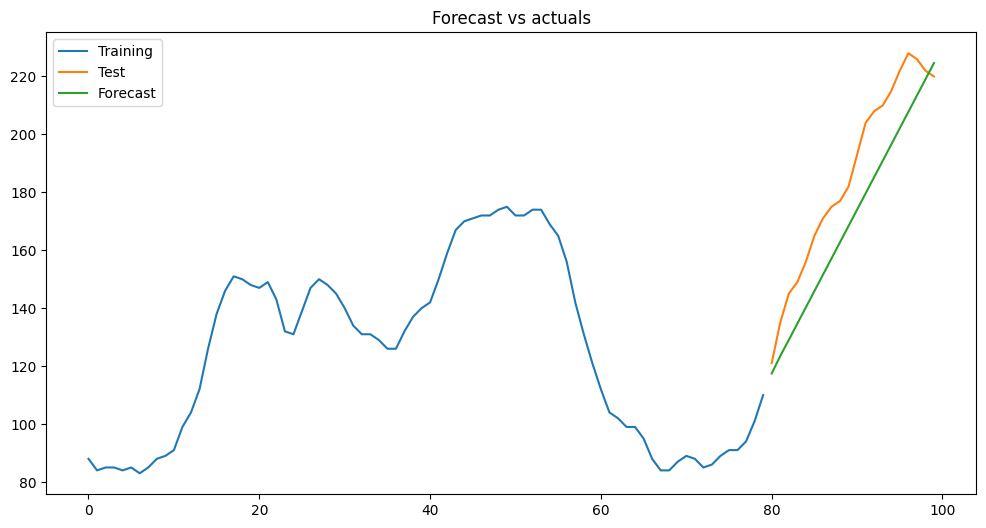

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast')
plt.title('Forecast vs actuals')
plt.legend()
plt.show()